In [6]:
from power_perceiver.load_raw.data_sources.raw_satellite_data_source import open_sat_data
from power_perceiver.load_prepared_batches.data_sources.satellite import SAT_MEAN, SAT_STD
import numpy as np
from copy import copy

In [2]:
sat_zarr_path = "/media/jack/wd_18tb/data/ocf/satellite/v3/eumetsat_seviri_hrv_uk.zarr"

In [3]:
sat_data_uint8 = open_sat_data(sat_zarr_path, convert_to_uint8=True)
sat_data_uint8

<xarray.DataArray 'data' (time_utc: 173624, channel: 1, y_geostationary: 891,
                          x_geostationary: 1843)>
dask.array<astype, shape=(173624, 1, 891, 1843), dtype=uint8, chunksize=(22, 1, 891, 1843), chunktype=numpy.ndarray>
Coordinates:
  * channel          (channel) <U3 'HRV'
  * x_geostationary  (x_geostationary) float32 -1.814e+06 -1.813e+06 ... 2.8e+04
  * y_geostationary  (y_geostationary) float32 5.088e+06 5.087e+06 ... 4.198e+06
  * time_utc         (time_utc) datetime64[ns] 2020-01-01T00:05:00 ... 2021-1...
    x_osgb           (y_geostationary, x_geostationary) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
    y_osgb           (y_geostationary, x_geostationary) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
Attributes:
    _satpy_id:                              !!python/object/apply:satpy.datas...
    ancillary_variables:                    []
    area:                                   msg_seviri_rss_1km:\n  descriptio...
    calibration:                            reflectance
    coordinates:                            acq_time
    georef_offset_corrected:                True
    modifiers:                              []
    name:                                   HRV
    orbital_parameters:                     projection_altitude: 35785831.0\n...
    platform_name:                          Meteosat-10
    reader:                                 seviri_l1b_native
    resolution:                             1000.134348869
    sensor:                                 seviri
    standard_name:                          toa_bidirectional_reflectance
    sun_earth_distance_correction_applied:  True
    sun_earth_distance_correction_factor:   1.0282367454433767
    wavelength:                             [0.5, 0.7, 0.9, 'µm']

In [4]:
sat_data_int16 = open_sat_data(sat_zarr_path, convert_to_uint8=False)
sat_data_int16

<xarray.DataArray 'data' (time_utc: 173624, channel: 1, y_geostationary: 891,
                          x_geostationary: 1843)>
dask.array<transpose, shape=(173624, 1, 891, 1843), dtype=int16, chunksize=(22, 1, 891, 1843), chunktype=numpy.ndarray>
Coordinates:
  * channel          (channel) <U3 'HRV'
  * x_geostationary  (x_geostationary) float32 -1.814e+06 -1.813e+06 ... 2.8e+04
  * y_geostationary  (y_geostationary) float32 5.088e+06 5.087e+06 ... 4.198e+06
  * time_utc         (time_utc) datetime64[ns] 2020-01-01T00:05:00 ... 2021-1...
    x_osgb           (y_geostationary, x_geostationary) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
    y_osgb           (y_geostationary, x_geostationary) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
Attributes:
    _satpy_id:                              !!python/object/apply:satpy.datas...
    ancillary_variables:                    []
    area:                                   msg_seviri_rss_1km:\n  descriptio...
    calibration:                            reflectance
    coordinates:                            acq_time
    georef_offset_corrected:                True
    modifiers:                              []
    name:                                   HRV
    orbital_parameters:                     projection_altitude: 35785831.0\n...
    platform_name:                          Meteosat-10
    reader:                                 seviri_l1b_native
    resolution:                             1000.134348869
    sensor:                                 seviri
    standard_name:                          toa_bidirectional_reflectance
    sun_earth_distance_correction_applied:  True
    sun_earth_distance_correction_factor:   1.0282367454433767
    wavelength:                             [0.5, 0.7, 0.9, 'µm']

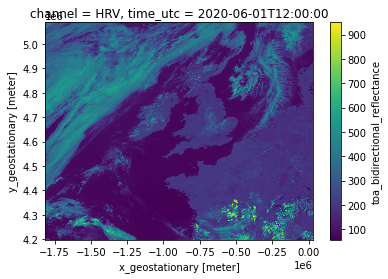

In [7]:
sat_data_int16.sel(time_utc="2020-06-01T12:00", channel="HRV").plot()

In [16]:


sat_data_uint8 = copy(sat_data_int16)
sat_data_uint8.data = (sat_data_int16.clip(0, 1023).astype(np.float32).data / 4.0).round().astype(np.uint8)
sat_data_uint8

<xarray.DataArray 'data' (time_utc: 173624, channel: 1, y_geostationary: 891,
                          x_geostationary: 1843)>
dask.array<astype, shape=(173624, 1, 891, 1843), dtype=uint8, chunksize=(22, 1, 891, 1843), chunktype=numpy.ndarray>
Coordinates:
  * channel          (channel) <U3 'HRV'
  * x_geostationary  (x_geostationary) float32 -1.814e+06 -1.813e+06 ... 2.8e+04
  * y_geostationary  (y_geostationary) float32 5.088e+06 5.087e+06 ... 4.198e+06
  * time_utc         (time_utc) datetime64[ns] 2020-01-01T00:05:00 ... 2021-1...
    x_osgb           (y_geostationary, x_geostationary) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
    y_osgb           (y_geostationary, x_geostationary) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
Attributes:
    _satpy_id:                              !!python/object/apply:satpy.datas...
    ancillary_variables:                    []
    area:                                   msg_seviri_rss_1km:\n  descriptio...
    calibration:                            reflectance
    coordinates:                            acq_time
    georef_offset_corrected:                True
    modifiers:                              []
    name:                                   HRV
    orbital_parameters:                     projection_altitude: 35785831.0\n...
    platform_name:                          Meteosat-10
    reader:                                 seviri_l1b_native
    resolution:                             1000.134348869
    sensor:                                 seviri
    standard_name:                          toa_bidirectional_reflectance
    sun_earth_distance_correction_applied:  True
    sun_earth_distance_correction_factor:   1.0282367454433767
    wavelength:                             [0.5, 0.7, 0.9, 'µm']

In [20]:
sat_data_uint8.sel(time_utc="2020-06-01T12:00", channel="HRV").min().compute()

<xarray.DataArray 'data' ()>
array(14, dtype=uint8)
Coordinates:
    channel   <U3 'HRV'
    time_utc  datetime64[ns] 2020-06-01T12:00:00

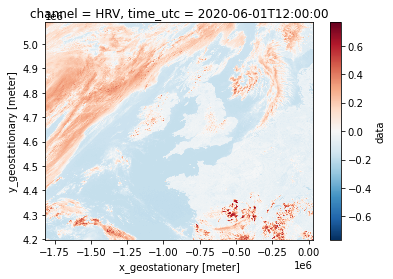

In [7]:
uint8_norm = (
    (sat_data_uint8.sel(time_utc="2020-06-01T12:00", channel="HRV").astype(np.float32)
     - (SAT_MEAN["HRV"] / 4)) 
    / (SAT_STD["HRV"] / 4)
    )
uint8_norm.plot();

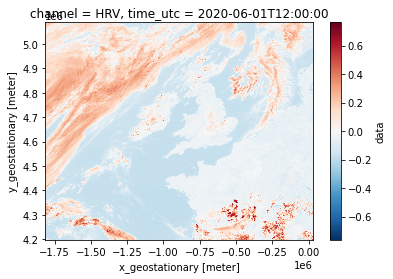

In [8]:
int16_norm = (
    (sat_data_int16.sel(time_utc="2020-06-01T12:00", channel="HRV").astype(np.float32)
     - SAT_MEAN["HRV"]) 
    / SAT_STD["HRV"]
    )
int16_norm.plot();

In [9]:
np.allclose(int16_norm, uint8_norm, atol=0.01)

True